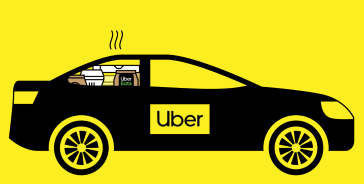

Objective:
* Understand the Dataset & cleanup (if required).
* Build Regression models to predict the fare price of uber ride.
* Also evaluate the models & compare thier respective scores like R2, RMSE, etc.

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Load the data
data=pd.read_csv("/content/drive/MyDrive/Deep Learning/Uber Fares /uber.csv")

# Domain Analysis
* key - a unique identifier for each trip
* fare_amount - the cost of each trip in usd
* pickup_datetime - date and time when the meter was engaged
* passenger_count - the number of passengers in the vehicle (driver entered value)
* pickup_longitude - the longitude where the meter was engaged
* pickup_latitude - the latitude where the meter was engaged
* dropoff_longitude - the longitude where the meter was disengaged
* dropoff_latitude - the latitude where the meter was disengaged

In [ ]:
# First five rows
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [ ]:
# Last five rows
data.tail()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1
199999,11951496,2010-05-15 04:08:00.00000076,14.1,2010-05-15 04:08:00 UTC,-73.984395,40.720077,-73.985508,40.768793,1


In [ ]:
# Shape of data
data.shape

(200000, 9)

In [ ]:
# Columns in data
data.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [ ]:
# Information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [ ]:
# Statistics of data
data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,200000.0,27712503.68,16013822.21,1.00,13825346.25,27745495.00,41555300.75,55423567.00
fare_amount,200000.0,11.36,9.90,-52.00,6.00,8.50,12.50,499.00
pickup_longitude,200000.0,-72.53,11.44,-1340.65,-73.99,-73.98,-73.97,57.42
pickup_latitude,200000.0,39.94,7.72,-74.02,40.73,40.75,40.77,1644.42
dropoff_longitude,199999.0,-72.53,13.12,-3356.67,-73.99,-73.98,-73.96,1153.57
dropoff_latitude,199999.0,39.92,6.79,-881.99,40.73,40.75,40.77,872.70
passenger_count,200000.0,1.68,1.39,0.00,1.00,1.00,2.00,208.00


In [ ]:
# Statistics of data for categorical 
data.describe(include="O").T

,count,unique,top,freq
key,200000,200000,2015-05-07 19:52:06.0000003,1
pickup_datetime,200000,196629,2014-04-13 18:19:00 UTC,4


In [ ]:
# Check missing values
data.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [ ]:
# Drop missing values
data.dropna(axis=0,inplace=True)
data.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [ ]:
# Drop unwanted columns
data.drop(['Unnamed: 0','key'],axis=1,inplace=True)

In [ ]:
data.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

# Exploratory Data Analysis

#### Univariate Analysis

In [ ]:
# Analyse fare Amount
data.fare_amount.describe()

count    199999.000000
mean         11.359892
std           9.901760
min         -52.000000
25%           6.000000
50%           8.500000
75%          12.500000
max         499.000000
Name: fare_amount, dtype: float64

### Fare Amount Distribution

Text(0.5, 0.98, 'Distribution of Uber fare')

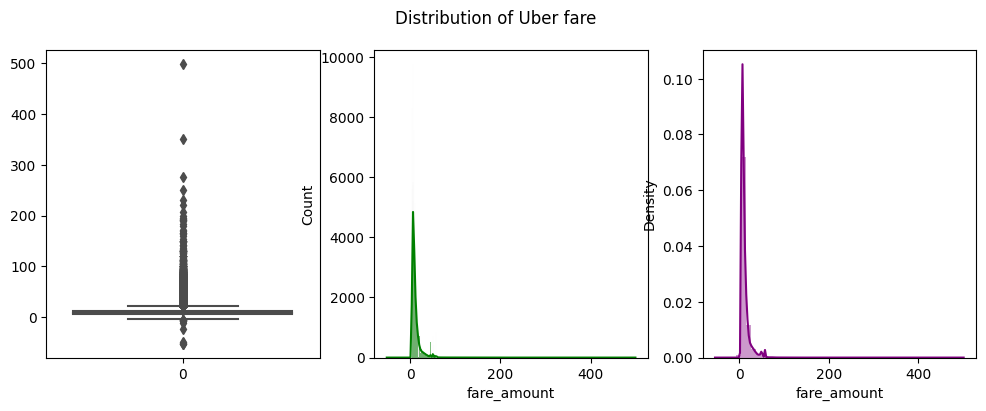

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(131)
sns.boxplot(data['fare_amount'],color='red')

plt.subplot(132)
sns.histplot(data['fare_amount'],kde=True,color='green')

plt.subplot(133)
sns.distplot(data['fare_amount'],color='purple')
plt.suptitle("Distribution of Uber fare")

 From above graphs we get to know that there are data points which are below 0 & fare can not be less than 0 for uber trip.so lets check these rows & try to handle these outliers.

In [ ]:
data[data['fare_amount']<=0].shape

(22, 7)

There are only 22 rows which have fare less than or equal to 0 dollar,our dataset contains 200000 rows so these outliers are just 0.00001% of total rows so we can drop these rows.  

Text(0.5, 0.98, 'Distribution of Uber fare after outlier detection')

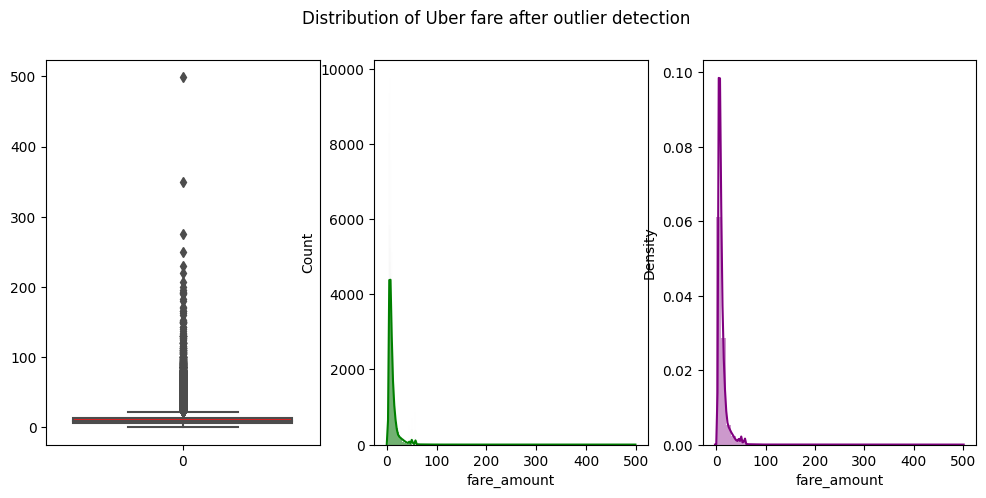

In [ ]:
data=data[data['fare_amount']>0 & (data['fare_amount']<200)]
plt.figure(figsize=(12,5))
plt.subplot(131)
sns.boxplot(data['fare_amount'],color='red')

plt.subplot(132)
sns.histplot(data['fare_amount'],kde=True,color='green')

plt.subplot(133)
sns.distplot(data['fare_amount'],color='purple')
plt.suptitle("Distribution of Uber fare after outlier detection")


# Analyze pickup-Datetime

In [ ]:
data['pickup_datetime']=pd.to_datetime(data['pickup_datetime'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199977 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        199977 non-null  float64            
 1   pickup_datetime    199977 non-null  datetime64[ns, UTC]
 2   pickup_longitude   199977 non-null  float64            
 3   pickup_latitude    199977 non-null  float64            
 4   dropoff_longitude  199977 non-null  float64            
 5   dropoff_latitude   199977 non-null  float64            
 6   passenger_count    199977 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 16.2 MB


In [ ]:
data.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

# Extract Features

In [ ]:
data['year']=data['pickup_datetime'].dt.year
data['month']=data['pickup_datetime'].dt.month
data['day']=data['pickup_datetime'].dt.day
data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28


### Extract weekdays & weekend

In [ ]:
data['weekday']=data['pickup_datetime'].dt.weekday
data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,3
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,4
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,0
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,4
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,3


In [ ]:
def isweekend(day):
  if day==6 or day==0:
    return 1
  else:
    return 0
data['weekend']=data['weekday'].apply(isweekend)

In [ ]:
data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,weekend
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,3,0
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,4,0
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,0,1
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,4,0
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,3,0


### Extract Time & Create bins

In [ ]:
data['time']=data['pickup_datetime'].dt.time
data['time'].head()

0    19:52:06
1    20:04:56
2    21:45:00
3    08:22:21
4    17:47:00
Name: time, dtype: object

In [ ]:
data['time']=data['time'].astype(str)
data[['hour','minute','seconds']]=data['time'].str.split(":",expand=True)

In [ ]:
data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,weekend,time,hour,minute,seconds
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,3,0,19:52:06,19,52,06
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,4,0,20:04:56,20,04,56
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,0,1,21:45:00,21,45,00
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,4,0,08:22:21,08,22,21
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,3,0,17:47:00,17,47,00


In [ ]:
data.drop(["pickup_datetime","time","minute","seconds"],axis=1,inplace=True)

In [ ]:
data.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'month', 'day', 'weekday', 'weekend', 'hour'],
      dtype='object')

# Analyze Passenger count

Text(0.5, 0.98, 'Distribution of Passenger ')

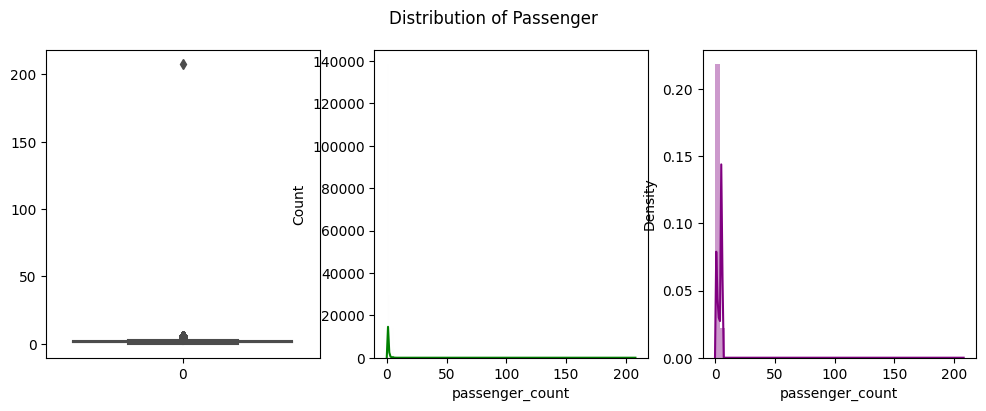

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(131)
sns.boxplot(data['passenger_count'],color='red')

plt.subplot(132)
sns.histplot(data['passenger_count'],kde=True,color='green')

plt.subplot(133)
sns.distplot(data['passenger_count'],color='purple')
plt.suptitle("Distribution of Passenger ")

Text(0.5, 0.98, 'Distribution of Passenger After outlier')

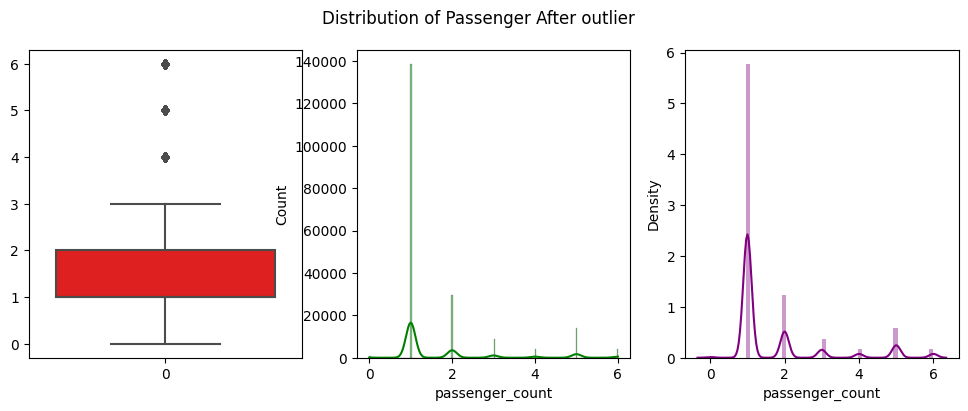

In [ ]:
data=data[data['passenger_count']<200]

plt.figure(figsize=(12,4))

plt.subplot(131)
sns.boxplot(data['passenger_count'],color='red')

plt.subplot(132)
sns.histplot(data['passenger_count'],kde=True,color='green')

plt.subplot(133)
sns.distplot(data['passenger_count'],color='purple')
plt.suptitle("Distribution of Passenger After outlier")

### Relationship between numerical columns & fare amount

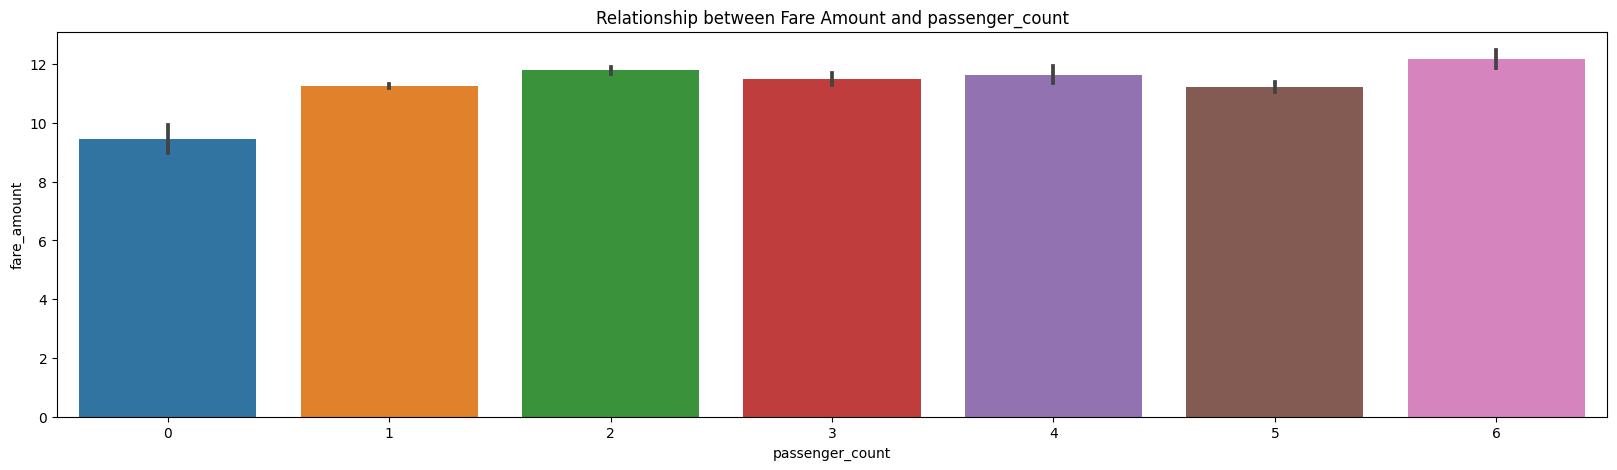

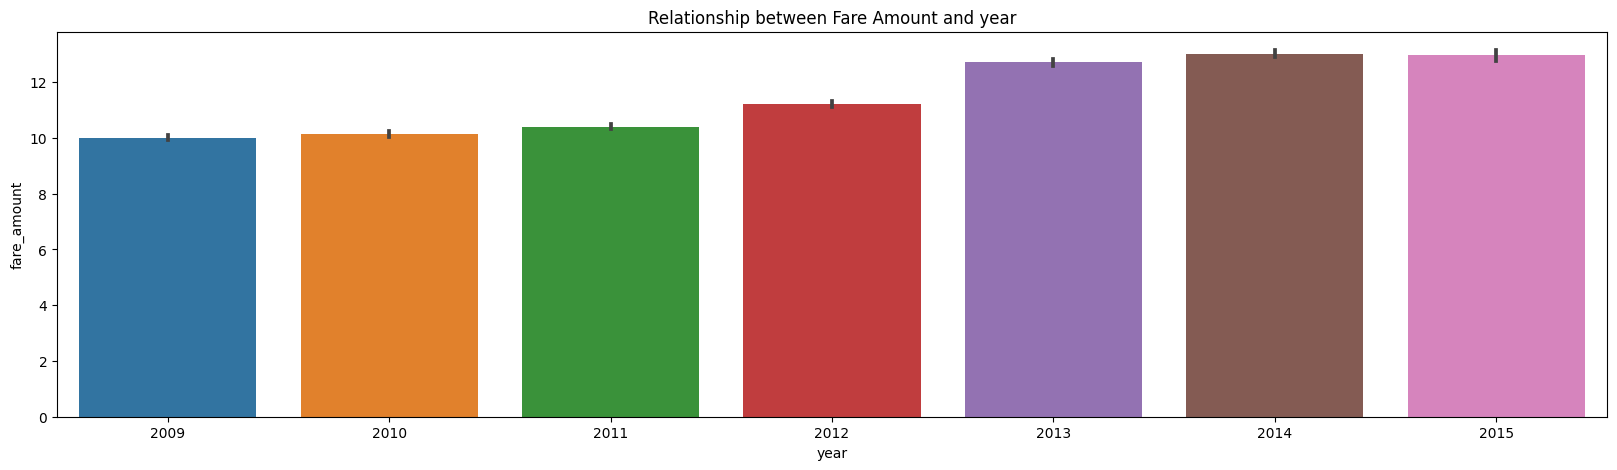

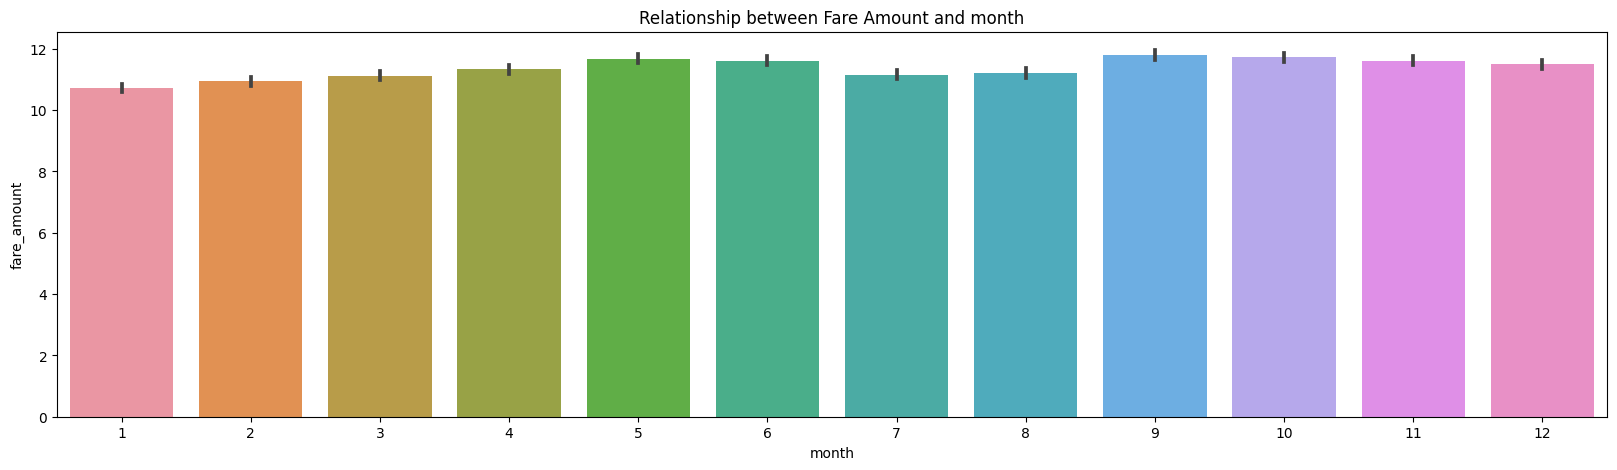

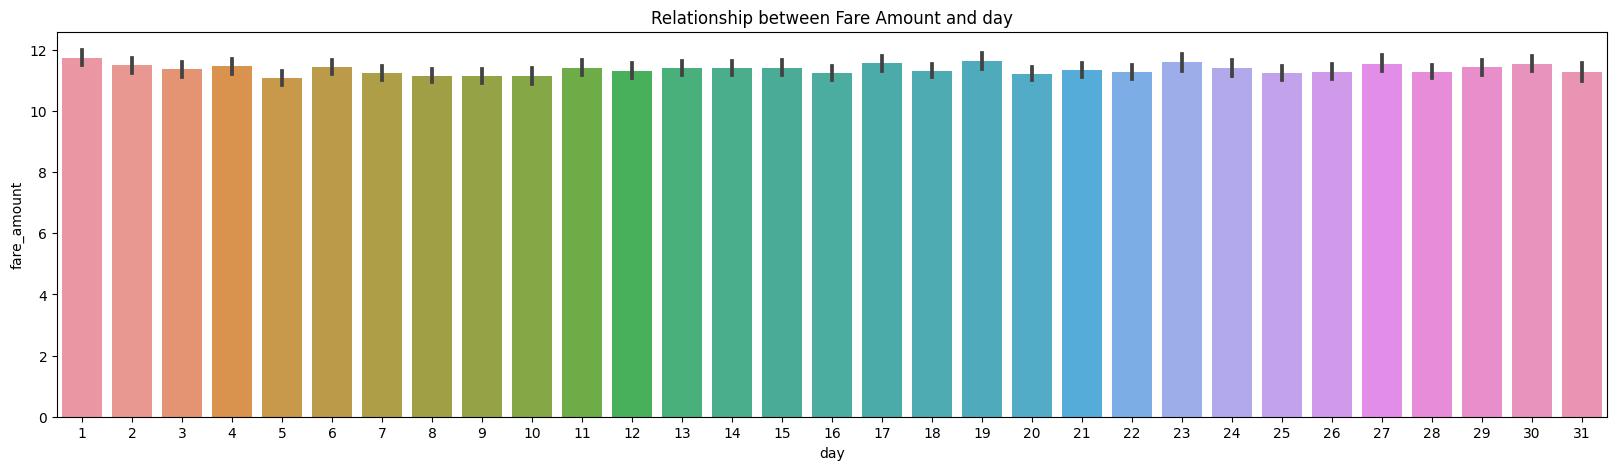

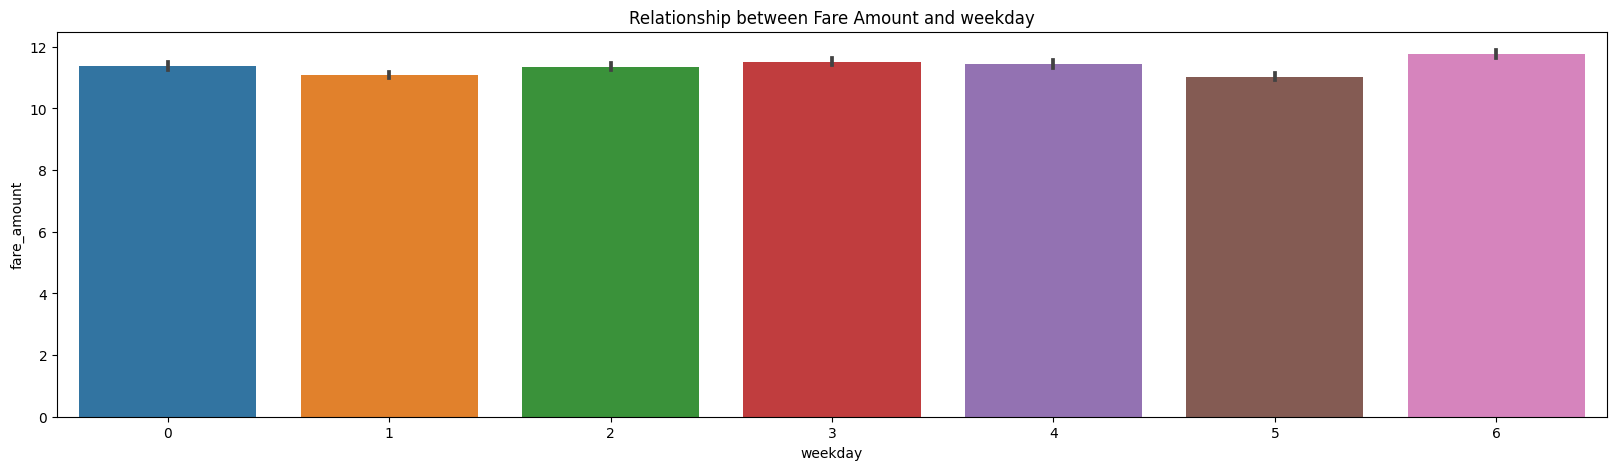

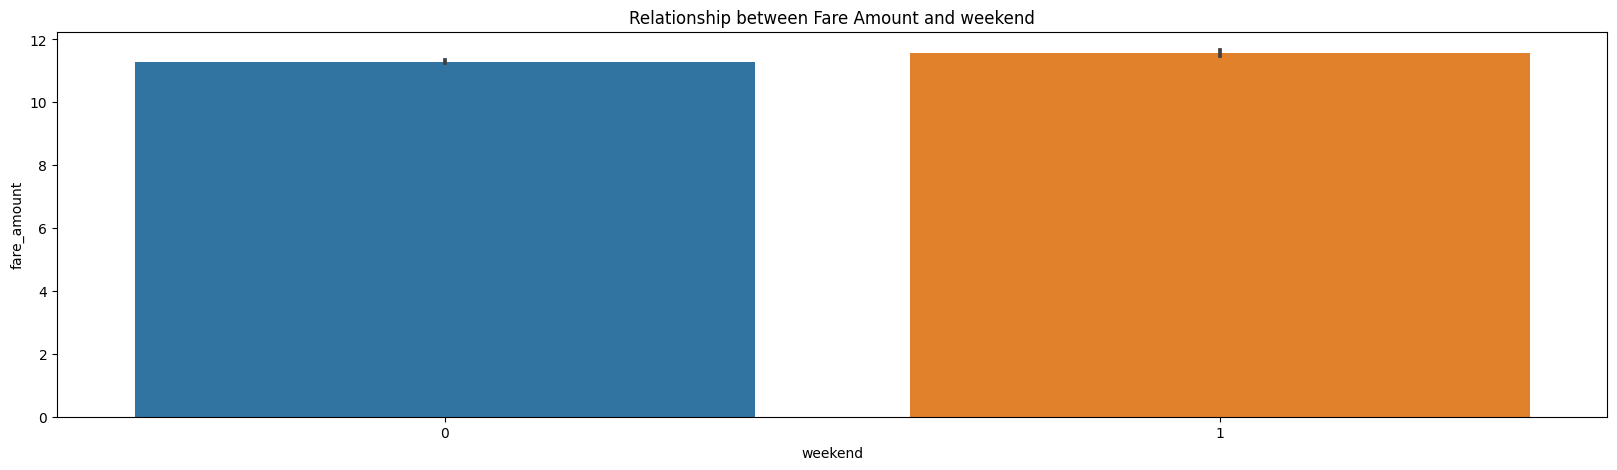

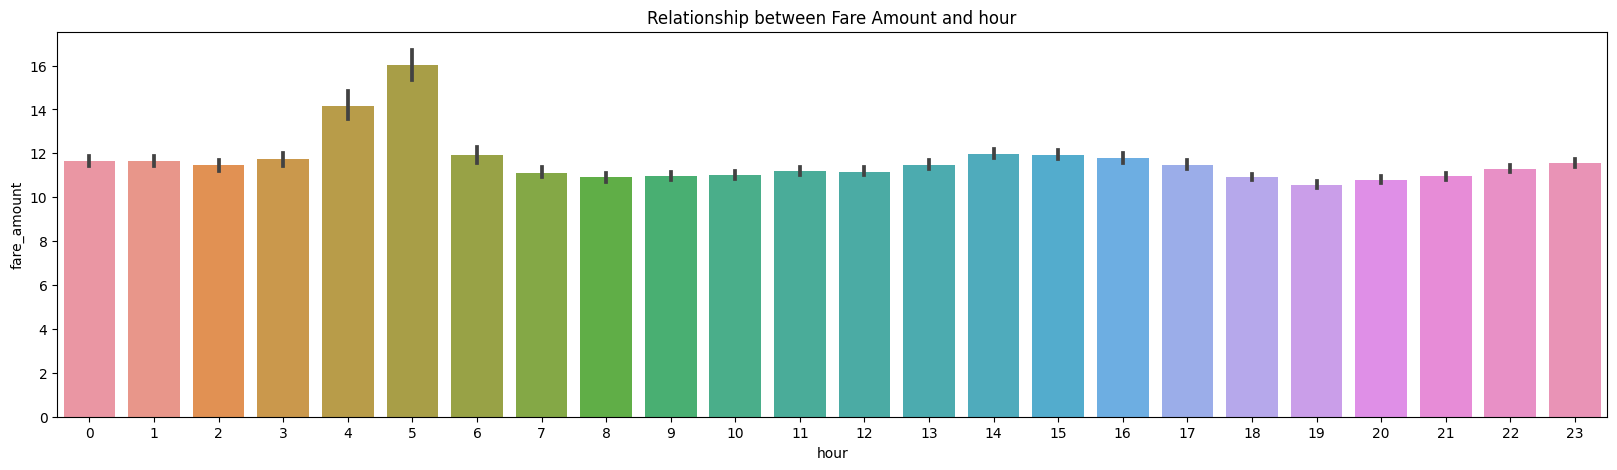

In [ ]:
num_col=['passenger_count', 'year','month', 'day', 'weekday', 'weekend', 'hour']
num_col_data=data[num_col].astype(int)
for col in data[num_col]:
  plt.figure(figsize=(20,5))
  sns.barplot(y=data['fare_amount'],x=num_col_data[col])
  plt.title("Relationship between Fare Amount and {}".format(col))

### Correlation Matrix

Text(0.5, 1.0, 'Correlation Matrix')

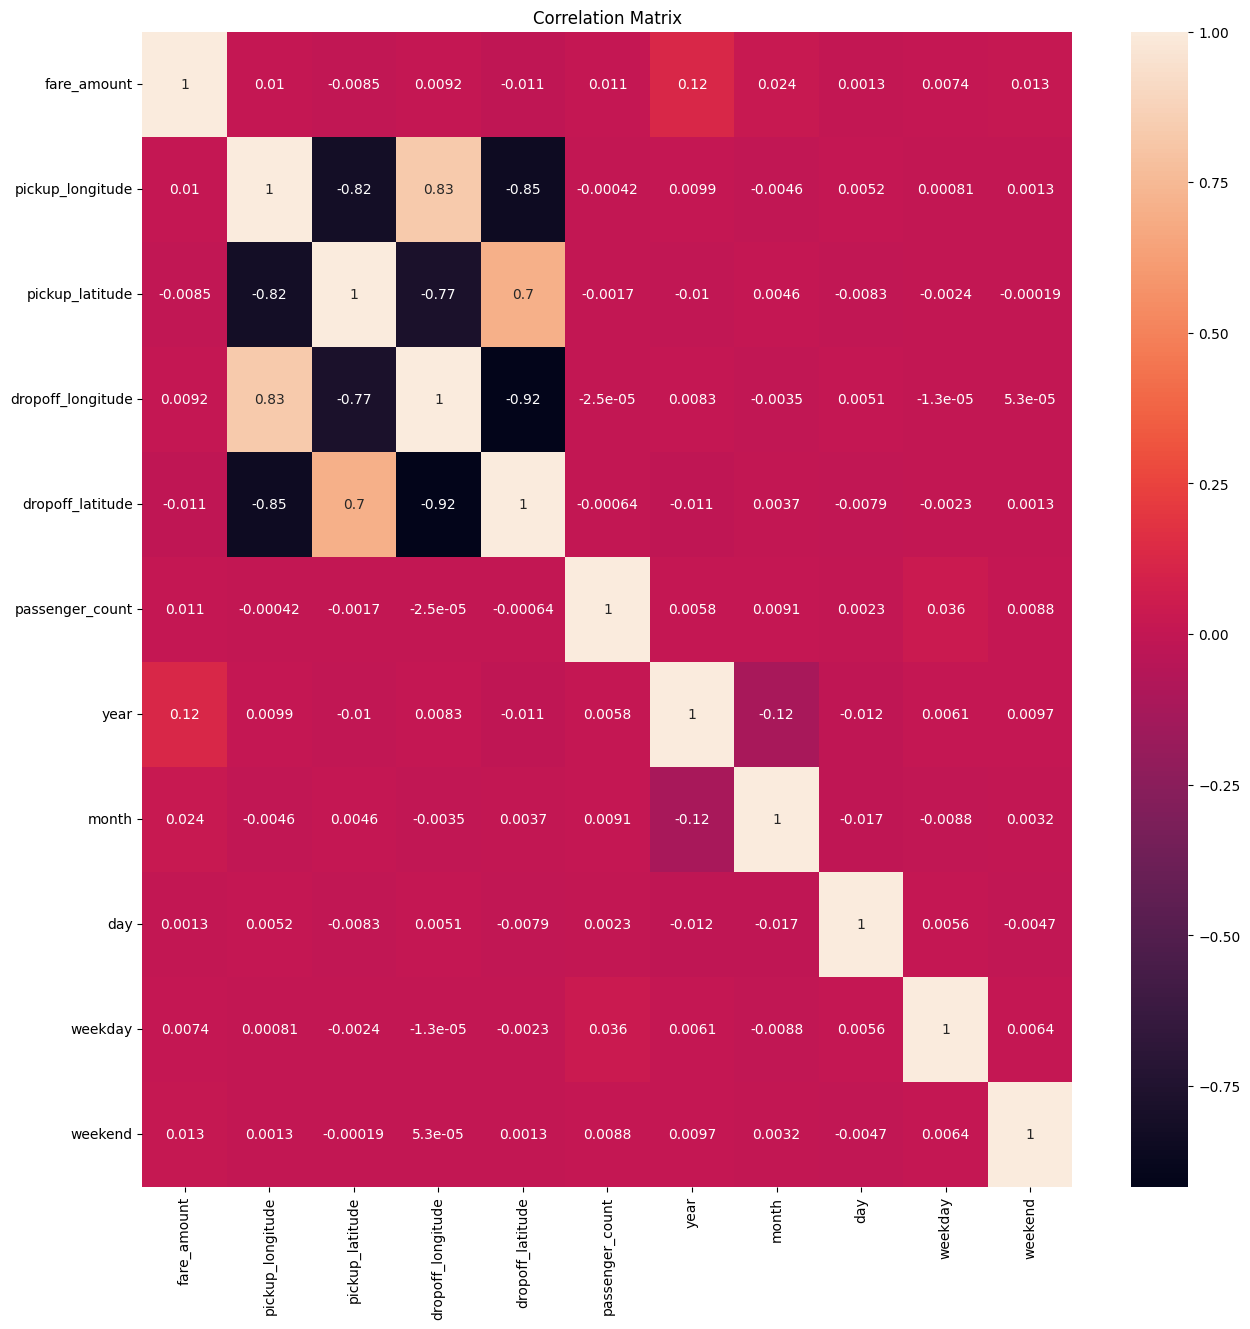

In [56]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,)
plt.title("Correlation Matrix")

# Splitting data into dependent & independendent

In [58]:
x=data.drop("fare_amount",axis=1)
y=data.fare_amount

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((159980, 11), (39996, 11), (159980,), (39996,))

### Standard Scaling

In [62]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_tf=sc.fit_transform(x_train)
x_test_tf=sc.fit_transform(x_test)

In [65]:
x_train_tf.shape,x_test_tf.shape

((159980, 11), (39996, 11))

## ANN Model to predict

In [67]:
import keras
from keras.layers import Dense
from keras.models import Sequential

In [72]:
model=Sequential()
model.add(Dense(units=32,kernel_initializer='uniform',activation='relu',input_dim=11))
model.add(Dense(units=64,kernel_initializer='uniform',activation='relu'))
model.add(Dense(units=218,kernel_initializer='uniform',activation='relu'))
model.add(Dense(units=215,kernel_initializer='uniform',activation='relu'))
model.add(Dense(units=1,activation='relu'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 32)                384       
                                                                 
 dense_25 (Dense)            (None, 64)                2112      
                                                                 
 dense_26 (Dense)            (None, 218)               14170     
                                                                 
 dense_27 (Dense)            (None, 215)               47085     
                                                                 
 dense_28 (Dense)            (None, 1)                 216       
                                                                 
Total params: 63,967
Trainable params: 63,967
Non-trainable params: 0
_________________________________________________________________


In [73]:
# Compile layer
model.compile(optimizer='adam',loss='MeanSquaredError',metrics='mean_squared_error')

In [75]:
model.fit(x_train_tf,y_train,epochs=5,batch_size=10,validation_data=(x_test_tf,y_test))

Epoch 1/5
15998/15998 [==============================] - 96s 6ms/step - loss: 98.4300 - mean_squared_error: 98.4300 - val_loss: 92.9317 - val_mean_squared_error: 92.9317
Epoch 2/5
15998/15998 [==============================] - 50s 3ms/step - loss: 97.7118 - mean_squared_error: 97.7118 - val_loss: 92.5490 - val_mean_squared_error: 92.5490
Epoch 3/5
15998/15998 [==============================] - 55s 3ms/step - loss: 97.5308 - mean_squared_error: 97.5308 - val_loss: 93.4715 - val_mean_squared_error: 93.4715
Epoch 4/5
15998/15998 [==============================] - 55s 3ms/step - loss: 97.4220 - mean_squared_error: 97.4220 - val_loss: 92.6384 - val_mean_squared_error: 92.6384
Epoch 5/5
15998/15998 [==============================] - 56s 3ms/step - loss: 97.7309 - mean_squared_error: 97.7309 - val_loss: 92.8451 - val_mean_squared_error: 92.8451


# Evaluate Model

In [78]:
y_pred=model.predict(x_test_tf)
print(y_pred)

1250/1250 [==============================] - 2s 2ms/step
[[ 9.2786455]
 [12.830763 ]
 [11.950907 ]
 ...
 [12.329559 ]
 [ 9.996706 ]
 [ 9.490194 ]]


In [79]:
from sklearn.metrics import mean_squared_error,r2_score
print(mean_squared_error(y_test,y_pred))

92.8450922913496


In [80]:
print(r2_score(y_test,y_pred))

0.014813666033968276
